In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column
from bokeh.io import output_notebook, show, save
from bokeh.models import CategoricalColorMapper
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, Range1d, FactorRange
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6, Spectral10, Spectral4
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import cumsum
from math import pi
from bokeh.palettes import Category20c
import plotly.graph_objects as go
import plotly.express as px
import warnings
from bokeh.models.glyphs import Text
from bokeh.transform import dodge

In [62]:
output_notebook()


Loading BokehJS ...

# Demographics Analysis

In [63]:
pd.set_option('display.max_columns', None)

In [64]:
path  = "../data/main.xlsx"

In [65]:

table2_dem = pd.read_excel(path,sheet_name="Table 2", usecols=range(0, 8))


In [66]:
table2_dem.info

<bound method DataFrame.info of        Demographics Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0          username        age        sex        bmi       psqi       race   
1      predict10091  53.645448          F  25.530409          5      White   
2      predict10092  53.645448          F   24.27256          8      White   
3      predict10181  43.110198          F  21.620041          3      White   
4      predict10182   42.96783          F  22.728657          2      White   
...             ...        ...        ...        ...        ...        ...   
89531           NaN        NaN        NaN        NaN        NaN        NaN   
89532           NaN        NaN        NaN        NaN        NaN        NaN   
89533           NaN        NaN        NaN        NaN        NaN        NaN   
89534           NaN        NaN        NaN        NaN        NaN        NaN   
89535           NaN        NaN        NaN        NaN        NaN        NaN   

      Unnamed: 6 Unnamed: 7  
0

In [67]:
table2_dem.head(6)

,Demographics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,username,age,sex,bmi,psqi,race,zygosity,country
1,predict10091,53.645448,F,25.530409,5,White,MZ,GB
2,predict10092,53.645448,F,24.27256,8,White,MZ,GB
3,predict10181,43.110198,F,21.620041,3,White,MZ,GB
4,predict10182,42.96783,F,22.728657,2,White,MZ,GB
5,predict10332,62.140999,F,22.37467,4,White,MZ,GB


In [68]:
table2_dem.tail(6)

,Demographics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
89530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_dem = table2_dem.dropna(how='all') #removes the NAN value in all the columns 
df_dem

,Demographics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,username,age,sex,bmi,psqi,race,zygosity,country
1,predict10091,53.645448,F,25.530409,5,White,MZ,GB
2,predict10092,53.645448,F,24.27256,8,White,MZ,GB
3,predict10181,43.110198,F,21.620041,3,White,MZ,GB
4,predict10182,42.96783,F,22.728657,2,White,MZ,GB
...,...,...,...,...,...,...,...,...
829,predict998971,59.427789,F,25.607152,NaN,Other or Mixed,NT,US
830,predict998981,64.342231,M,30.371478,NaN,White,NT,US
831,predict998991,30.844627,F,22.920658,NaN,White,NT,US
832,predict999001,42.184805,F,21.94219,NaN,African,NT,US


In [70]:
df_dem.tail(6)

,Demographics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
828,predict998961,58.414784,M,27.522406,NaN,White,NT,US
829,predict998971,59.427789,F,25.607152,NaN,Other or Mixed,NT,US
830,predict998981,64.342231,M,30.371478,NaN,White,NT,US
831,predict998991,30.844627,F,22.920658,NaN,White,NT,US
832,predict999001,42.184805,F,21.94219,NaN,African,NT,US
833,predict9991,55.82204,F,26.113602,5,White,MZ,GB


In [71]:
df_dem = df_dem.drop(index=0)

In [72]:
df_dem

,Demographics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1,predict10091,53.645448,F,25.530409,5,White,MZ,GB
2,predict10092,53.645448,F,24.27256,8,White,MZ,GB
3,predict10181,43.110198,F,21.620041,3,White,MZ,GB
4,predict10182,42.96783,F,22.728657,2,White,MZ,GB
5,predict10332,62.140999,F,22.37467,4,White,MZ,GB
...,...,...,...,...,...,...,...,...
829,predict998971,59.427789,F,25.607152,NaN,Other or Mixed,NT,US
830,predict998981,64.342231,M,30.371478,NaN,White,NT,US
831,predict998991,30.844627,F,22.920658,NaN,White,NT,US
832,predict999001,42.184805,F,21.94219,NaN,African,NT,US


In [73]:
'''change the column name.'''

new_col = ["username", "age", "sex", "bmi", "psqi", "race", "zygosity","country"]  
column_map = {df_dem.columns[i]: new_col[i] for i in range(len(df_dem.columns))}
df_dem= df_dem.rename(columns=column_map)

In [74]:
df_dem

,username,age,sex,bmi,psqi,race,zygosity,country
1,predict10091,53.645448,F,25.530409,5,White,MZ,GB
2,predict10092,53.645448,F,24.27256,8,White,MZ,GB
3,predict10181,43.110198,F,21.620041,3,White,MZ,GB
4,predict10182,42.96783,F,22.728657,2,White,MZ,GB
5,predict10332,62.140999,F,22.37467,4,White,MZ,GB
...,...,...,...,...,...,...,...,...
829,predict998971,59.427789,F,25.607152,NaN,Other or Mixed,NT,US
830,predict998981,64.342231,M,30.371478,NaN,White,NT,US
831,predict998991,30.844627,F,22.920658,NaN,White,NT,US
832,predict999001,42.184805,F,21.94219,NaN,African,NT,US


In [75]:
df_dem.reset_index(drop=True, inplace=True)
df_dem

,username,age,sex,bmi,psqi,race,zygosity,country
0,predict10091,53.645448,F,25.530409,5,White,MZ,GB
1,predict10092,53.645448,F,24.27256,8,White,MZ,GB
2,predict10181,43.110198,F,21.620041,3,White,MZ,GB
3,predict10182,42.96783,F,22.728657,2,White,MZ,GB
4,predict10332,62.140999,F,22.37467,4,White,MZ,GB
...,...,...,...,...,...,...,...,...
828,predict998971,59.427789,F,25.607152,NaN,Other or Mixed,NT,US
829,predict998981,64.342231,M,30.371478,NaN,White,NT,US
830,predict998991,30.844627,F,22.920658,NaN,White,NT,US
831,predict999001,42.184805,F,21.94219,NaN,African,NT,US


In [76]:
'''Check the null values.'''

num_nans = df_dem["psqi"].isna().sum()
num_nans

106

In [77]:
df_dem['age'] = df_dem['age'].astype(int)


In [78]:
df_dem['bmi'] = df_dem['bmi'].apply(lambda x:round(x,2))

In [79]:
df_dem

,username,age,sex,bmi,psqi,race,zygosity,country
0,predict10091,53,F,25.53,5,White,MZ,GB
1,predict10092,53,F,24.27,8,White,MZ,GB
2,predict10181,43,F,21.62,3,White,MZ,GB
3,predict10182,42,F,22.73,2,White,MZ,GB
4,predict10332,62,F,22.37,4,White,MZ,GB
...,...,...,...,...,...,...,...,...
828,predict998971,59,F,25.61,NaN,Other or Mixed,NT,US
829,predict998981,64,M,30.37,NaN,White,NT,US
830,predict998991,30,F,22.92,NaN,White,NT,US
831,predict999001,42,F,21.94,NaN,African,NT,US


In [80]:
df_dem["age"].min()

18

In [81]:
df_dem["age"].max()

65

In [82]:
output_notebook()

Loading BokehJS ...

In [83]:
age_ranges = ['20-30', '30-40', '40-50', '50-60', '60-70']
age_counts = []
for i in range(len(age_ranges)):
    if i == len(age_ranges) - 1:
        count = len(df_dem[(df_dem['age'] >= int(age_ranges[i].split('-')[0])) & (df_dem['age'] <= int(age_ranges[i].split('-')[1]))])
    else:
        count = len(df_dem[(df_dem['age'] >= int(age_ranges[i].split('-')[0])) & (df_dem['age'] < int(age_ranges[i].split('-')[1]))])
    age_counts.append(count)

# create a ColumnDataSource with the data
# colors = ['#FFC300', '#DAF7A6','#228B22', '#9ACD32', '#FF5733']
colors = ['#DAF7A6', '#9ACD32', '#228B22', '#FF6666', '#CC0000']

# create a ColumnDataSource with the data
source = ColumnDataSource(data=dict(age_ranges=age_ranges, age_counts=age_counts))

# create the figure
p = figure(x_range=FactorRange(factors=age_ranges), y_range=Range1d(0, max(age_counts) + 50), plot_height=400, plot_width=800, title="Different Age Groups")

# add the bars to the plot with the color mapping
p.vbar(x='age_ranges', top='age_counts', width=0.9, source=source, line_color='white',
       fill_color=factor_cmap('age_ranges', palette=colors, factors=age_ranges))

# set the x-axis and y-axis labels
p.xaxis.axis_label = "Age Group"
p.yaxis.axis_label = "Number of People"

# show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [84]:
gender_counts = df_dem['sex'].value_counts()
gender_list = gender_counts.index.tolist()
count_list = gender_counts.tolist()
colors = ['#3182bd', '#e6550d']  # blue for male, orange for female
color_mapper = CategoricalColorMapper(factors=gender_list, palette=colors)
source = ColumnDataSource(data=dict(gender=gender_list, count=count_list, color=colors))
p2 = figure(title='Gender Distribution', x_range=gender_list, x_axis_label='Gender', y_axis_label='Count')
p2.vbar(x='gender', top='count', width=0.8, source=source, color = 'color')

show(p2)



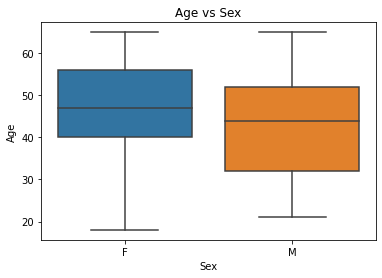

In [85]:
# Boxplot of age by sex
sns.boxplot(x='sex', y='age', data=df_dem)
plt.title('Age vs Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

In [86]:
bins = [18, 25, 35, 45, 55, 65]

# Group ages into bins
age_bins = pd.cut(df_dem['age'], bins=bins, labels=['18-24', '25-34', '35-44', '45-54', '55-65'])

# Define color mapper
color_mapper = CategoricalColorMapper(factors=['18-24', '25-34', '35-44', '45-54', '55-65'],
                                       palette=['#DAF7A6', '#9ACD32', '#228B22', '#FF6666', '#CC0000'])

source = ColumnDataSource(data=dict(age=df_dem['age'], bmi=df_dem['bmi'], age_bins=age_bins))
p1 = figure(title='Age vs BMI', x_axis_label='Age', y_axis_label='BMI', plot_width=800, plot_height=500)
p1.circle('age', 'bmi', width=2, source=source, color=factor_cmap('age_bins', palette=color_mapper.palette, factors=color_mapper.factors))

show(p1)

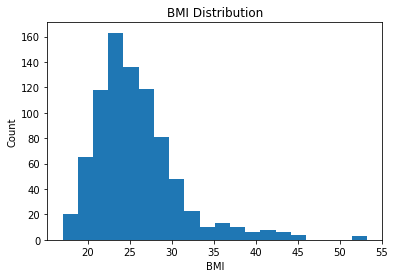

In [87]:

# Histogram of BMI
plt.hist(x='bmi', data=df_dem, bins=20)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

In [88]:
# Define BMI ranges and categories
bmi_ranges = [(0, 18.5), (18.5, 25), (25, 30), (30, df_dem['bmi'].max() + 1)]
bmi_categories = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']

# Define colors for each category
colors = ['#90EE90', '#008000', '#FF6666', '#CC0000']

# Create a dictionary to count the number of people in each BMI category
bmi_counts = {'Underweight': 0, 'Healthy Weight': 0, 'Overweight': 0, 'Obese': 0}

for i in range(len(bmi_ranges)):
    lower_bound = bmi_ranges[i][0]
    upper_bound = bmi_ranges[i][1]
    category = bmi_categories[i]
    count = ((df_dem['bmi'] >= lower_bound) & (df_dem['bmi'] < upper_bound)).sum()
    bmi_counts[category] = count

# Create a ColumnDataSource
source = ColumnDataSource(data={
    'bmi_categories': bmi_categories,
    'bmi_counts': [bmi_counts[cat] for cat in bmi_categories],
    'colors': colors
})

# Create the plot
p = figure(x_range=bmi_categories, plot_height=400, plot_width=600,
           title='BMI Distribution', tools='pan,wheel_zoom,reset')
p.vbar(x='bmi_categories', top='bmi_counts', width=0.9, source=source,
       fill_color='colors', line_color='white')

# Set axis labels
p.xaxis.axis_label = 'BMI Categories'
p.yaxis.axis_label = 'Number of People'

# Show the plot
show(p)

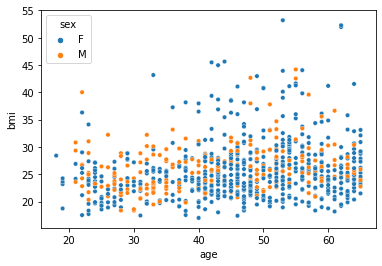

In [89]:

import matplotlib.pyplot as plt
import seaborn as sns

# create scatter plot with different colors and sizes based on gender
sns.scatterplot(data=df_dem, x="age", y="bmi", hue="sex", size="sex", sizes=(20, 20))

# create heatmap based on age and bmi
# sns.jointplot(data=df_dem, x="age", y="bmi", kind="hex", color="#4CB391")

# display the plots
plt.show()

In [92]:
# Group the DataFrame by country and count the number of people in each group
country_counts = df_dem.groupby('country').size().reset_index(name='counts')
country_counts['angle'] = country_counts['counts']/country_counts['counts'].sum() * 2*pi
country_counts['color'] = Spectral4[:len(country_counts)]
country_counts



# create a new pie chart
fig = go.Figure(data=[go.Pie(labels=country_counts['country'],
                             values=country_counts['counts'],
                             hovertemplate='%{label}: %{value}',
                             textinfo='value+percent',
                             textposition='inside')])

# set the colors and hole size of the chart
fig.update_traces(marker=dict(colors=country_counts['color']), hole=.4)

# add a title and remove the legend
fig.update_layout(title='Peope Percentage by Country', showlegend=True)

# show the plot
fig.show()






In [93]:
country_counts = df_dem.groupby('race').size().reset_index(name='counts')

# country_counts
# Create a ColumnDataSource with the data
source = ColumnDataSource(country_counts)

# Define the x-axis categories (i.e. the countries)
countries = source.data['race'].tolist()
# countries
# Create the figure
p = figure(x_range=FactorRange(factors=countries), plot_height=500, plot_width=800, title='Number of People by Race')

# Add the bars to the plot, with each country having a different color
colors = factor_cmap('race', palette=Spectral10, factors=countries)
p.vbar(x='race', top='counts', source=source, width=0.9, line_color='white', fill_color=colors)

# Set the x-axis and y-axis labels
p.xaxis.axis_label = 'Race'
p.yaxis.axis_label = 'Number of People'


# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [94]:
zygosity_counts = df_dem.groupby('zygosity').size().reset_index(name='counts')
zygosity_counts['angle'] = zygosity_counts['counts']/zygosity_counts['counts'].sum() * 2*pi
zygosity_counts['color'] = Spectral10[:len(zygosity_counts)]
zygosity_counts


# create a new pie chart
fig = go.Figure(data=[go.Pie(labels=zygosity_counts['zygosity'],
                             values=zygosity_counts['counts'],
                             hovertemplate='%{label}: %{value}',
                             textinfo='value+percent',
                             textposition='inside')])

# set the colors and hole size of the chart
fig.update_traces(marker=dict(colors=zygosity_counts['color']), hole=.4)

# add a title and remove the legend
fig.update_layout(title='Zygosity Distribution', showlegend=True)

# show the plot
fig.show()



In [95]:
zygosity_counts

,zygosity,counts,angle,color
0,DZ,134,1.010740,#5e4fa2
1,MZ,340,2.564565,#3288bd
2,NT,359,2.707879,#66c2a5


In [96]:
# Define BMI ranges and categories
psqi_ranges = [(0, 4), (4,11), (11,21)]
psqi_categories = ['Excellent Sleep Quality', 'Good Sleep Quality', 'Poor Sleep Quality']

# Define colors for each category
colors = ['#008000', '#FF6666', '#CC0000']

# Create a dictionary to count the number of people in each psqi category
psqi_counts = {'Excellent Sleep Quality': 0, 'Good Sleep Quality': 0, 'Poor Sleep Quality': 0}

for i in range(len(psqi_ranges)):
    lower_bound = psqi_ranges[i][0]
    upper_bound = psqi_ranges[i][1]
    category = psqi_categories[i]
    count = ((df_dem['psqi'] >= lower_bound) & (df_dem['psqi'] < upper_bound)).sum()
    psqi_counts[category] = count

# Create a ColumnDataSource
source = ColumnDataSource(data={
    'psqi_categories': psqi_categories,
    'psqi_counts': [psqi_counts[cat] for cat in psqi_categories],
    'colors': colors
})

# Create the plot
p = figure(x_range=psqi_categories, plot_height=400, plot_width=600,
           title='Pittsburgh Sleep Quality Index Distribution', tools='pan,wheel_zoom,reset')
p.vbar(x='psqi_categories', top='psqi_counts', width=0.9, source=source,
       fill_color='colors', line_color='white')

# Set axis labels
p.xaxis.axis_label = 'psqi Categories'
p.yaxis.axis_label = 'Number of People'

# Show the plot
show(p)



In [102]:
df_psqi = pd.read_excel(path, sheet_name='Table 2',usecols=range(0, 8))
df_psqi = df_psqi.drop(index=0)
new_col = ["username", "age", "sex", "bmi", "psqi", "race", "zygosity","country"]  
column_map = {df_psqi .columns[i]: new_col[i] for i in range(len(df_psqi.columns))}
df_psqi  = df_psqi.rename(columns=column_map)
df_psqi = df_psqi.dropna(how='all')
df_psqi = df_psqi.dropna(subset=['psqi'])
df_psqi['psqi'] = df_psqi['psqi'].astype(int)

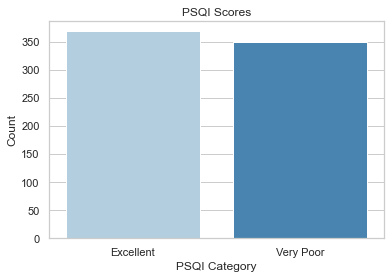

In [103]:

# Define the bin ranges and labels
bin_ranges = [0, 4, 21]
bin_labels = ['Excellent', 'Very Poor']

# Cut the PSQI scores into bins and assign labels
df_psqi['psqi_bin'] = pd.cut(df_psqi['psqi'], bins=bin_ranges, labels=bin_labels)

# Calculate the count of each bin
bin_counts = df_psqi['psqi_bin'].value_counts()

# Create a bar plot using seaborn
sns.set(style='whitegrid')
ax = sns.barplot(x=bin_counts.index, y=bin_counts, palette='Blues')

# Set the x-axis labels using the bin_labels
ax.set_xticklabels(bin_labels)

# Set the plot title and axis labels
ax.set(title='PSQI Scores', xlabel='PSQI Category', ylabel='Count')

# Show the plot
plt.show()

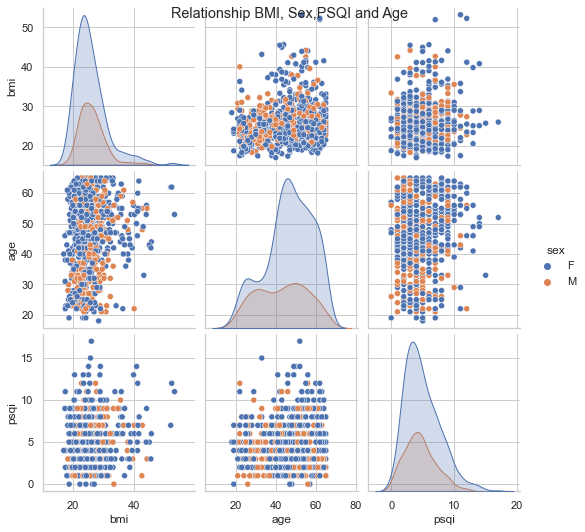

In [104]:
'''A pairplot using seaborn to visualize the relationship between BMI, age, and PSQI scores, 
with the data separated by sex.'''

sns.pairplot(data=df_dem, vars=['bmi', 'age','psqi'], hue='sex')

# Set the title of the plot
plt.suptitle('Relationship BMI, Sex,PSQI and Age')

# Show the plot
plt.show()

# Sleep Analysis

In [105]:
table2_sleep = pd.read_excel(path,sheet_name="Table 2", usecols=range(9, 14))

In [106]:
table2_sleep.info

<bound method DataFrame.info of               Sleep Unnamed: 10 Unnamed: 11    Unnamed: 12     Unnamed: 13
0          username         spt          se  sleeponset_hr  sleepoffset_hr
1      predict10091    8.497222     0.89915          -1.35            7.15
2      predict10091    9.959722    0.921071          -0.65             9.3
3      predict10091    8.426389    0.859733       0.916667        9.333333
4      predict10091    9.122222    0.953715           -1.1        8.016667
...             ...         ...         ...            ...             ...
89531           NaN         NaN         NaN            NaN             NaN
89532           NaN         NaN         NaN            NaN             NaN
89533           NaN         NaN         NaN            NaN             NaN
89534           NaN         NaN         NaN            NaN             NaN
89535           NaN         NaN         NaN            NaN             NaN

[89536 rows x 5 columns]>

In [107]:
table2_sleep.tail(10)

,Sleep,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
89526,NaN,NaN,NaN,NaN,NaN
89527,NaN,NaN,NaN,NaN,NaN
89528,NaN,NaN,NaN,NaN,NaN
89529,NaN,NaN,NaN,NaN,NaN
89530,NaN,NaN,NaN,NaN,NaN
89531,NaN,NaN,NaN,NaN,NaN
89532,NaN,NaN,NaN,NaN,NaN
89533,NaN,NaN,NaN,NaN,NaN
89534,NaN,NaN,NaN,NaN,NaN
89535,NaN,NaN,NaN,NaN,NaN


In [108]:
df_sleep = table2_sleep.dropna(how='all') #removes the NAN value in all the columns 
df_sleep

,Sleep,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,username,spt,se,sleeponset_hr,sleepoffset_hr
1,predict10091,8.497222,0.89915,-1.35,7.15
2,predict10091,9.959722,0.921071,-0.65,9.3
3,predict10091,8.426389,0.859733,0.916667,9.333333
4,predict10091,9.122222,0.953715,-1.1,8.016667
...,...,...,...,...,...
9538,predict9991,7.984722,0.867977,2.933333,10.916667
9539,predict9991,8.277778,0.961409,3.266667,11.533333
9540,predict9991,9.181944,0.927243,1.466667,10.65
9541,predict9991,7.973611,0.912907,1.9,9.883333


In [109]:
df_sleep = df_sleep.drop(index=0)

In [110]:
df_sleep

,Sleep,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
1,predict10091,8.497222,0.89915,-1.35,7.15
2,predict10091,9.959722,0.921071,-0.65,9.3
3,predict10091,8.426389,0.859733,0.916667,9.333333
4,predict10091,9.122222,0.953715,-1.1,8.016667
5,predict10091,10.604167,0.896136,-0.9,9.7
...,...,...,...,...,...
9538,predict9991,7.984722,0.867977,2.933333,10.916667
9539,predict9991,8.277778,0.961409,3.266667,11.533333
9540,predict9991,9.181944,0.927243,1.466667,10.65
9541,predict9991,7.973611,0.912907,1.9,9.883333


In [111]:
'''change the column name.'''

new_col = ['username', 'sleep_period_time', 'sleep_efficiency', 'sleep_onset', 'sleep_offset'] 
column_map = {df_sleep.columns[i]: new_col[i] for i in range(len(df_sleep.columns))}
df_sleep = df_sleep.rename(columns=column_map)

In [112]:
df_sleep

,username,sleep_period_time,sleep_efficiency,sleep_onset,sleep_offset
1,predict10091,8.497222,0.89915,-1.35,7.15
2,predict10091,9.959722,0.921071,-0.65,9.3
3,predict10091,8.426389,0.859733,0.916667,9.333333
4,predict10091,9.122222,0.953715,-1.1,8.016667
5,predict10091,10.604167,0.896136,-0.9,9.7
...,...,...,...,...,...
9538,predict9991,7.984722,0.867977,2.933333,10.916667
9539,predict9991,8.277778,0.961409,3.266667,11.533333
9540,predict9991,9.181944,0.927243,1.466667,10.65
9541,predict9991,7.973611,0.912907,1.9,9.883333


In [113]:
df_sleep.reset_index(drop=True, inplace=True)
df_sleep

,username,sleep_period_time,sleep_efficiency,sleep_onset,sleep_offset
0,predict10091,8.497222,0.89915,-1.35,7.15
1,predict10091,9.959722,0.921071,-0.65,9.3
2,predict10091,8.426389,0.859733,0.916667,9.333333
3,predict10091,9.122222,0.953715,-1.1,8.016667
4,predict10091,10.604167,0.896136,-0.9,9.7
...,...,...,...,...,...
9537,predict9991,7.984722,0.867977,2.933333,10.916667
9538,predict9991,8.277778,0.961409,3.266667,11.533333
9539,predict9991,9.181944,0.927243,1.466667,10.65
9540,predict9991,7.973611,0.912907,1.9,9.883333


In [114]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           9542 non-null   object
 1   sleep_period_time  9542 non-null   object
 2   sleep_efficiency   9542 non-null   object
 3   sleep_onset        9542 non-null   object
 4   sleep_offset       9542 non-null   object
dtypes: object(5)
memory usage: 372.9+ KB


In [116]:
# Group the rows by username and calculate the mean of each column for each group
averages_df = df_sleep.groupby('username').mean()

averages_df

,sleep_period_time,sleep_efficiency,sleep_onset,sleep_offset
username,,,,
predict10091,8.766468,0.919705,-0.614286,8.147619
predict10092,7.274769,0.905660,-0.086111,7.191667
predict10181,8.958333,0.868946,-2.795833,6.162500
predict10182,8.747096,0.860943,-2.572727,6.175758
predict10332,7.280556,0.890666,-1.347222,5.931944
...,...,...,...,...
predict998971,7.893697,0.866147,-0.812820,7.085897
predict998981,8.039722,0.858295,-1.005000,7.033333
predict998991,6.951389,0.946908,-2.209259,4.740741


In [117]:
# Read the xlsx file into a pandas dataframe
table2_alr = pd.read_excel(path, sheet_name='Table 2')

# Select the 10th to 14th column using iloc and create a new dataframe
table2_alr = table2_alr.iloc[:, [15, 17]]

In [118]:
table2_alr

,Alertness,Unnamed: 17
0,username,al_rating
1,predict10091,53
2,predict10091,54
3,predict10091,58
4,predict10091,64
...,...,...
89531,predict9991,79
89532,predict9991,86
89533,predict9991,84
89534,predict9991,80


In [119]:

table2_alr = table2_alr.drop(index=0)



In [120]:
table2_alr.columns = ['username', 'alertness_rating']
table2_alr.reset_index(drop=True, inplace=True)

In [121]:
table2_alr

,username,alertness_rating
0,predict10091,53
1,predict10091,54
2,predict10091,58
3,predict10091,64
4,predict10091,31
...,...,...
89530,predict9991,79
89531,predict9991,86
89532,predict9991,84
89533,predict9991,80


In [123]:
# Group the rows by username and calculate the mean of each column for each group
avg_al_df = table2_alr.groupby('username').mean()

avg_al_df

,alertness_rating
username,
predict10091,52.311111
predict10092,64.076923
predict10181,79.989796
predict10182,88.598291
predict10332,73.049296
...,...
predict998971,77.510417
predict998981,68.292857
predict998991,61.635294


In [125]:
# Merge the two dataframes based on the 'username' column
merged_df = pd.merge(avg_al_df, averages_df, on='username')


merged_df

,alertness_rating,sleep_period_time,sleep_efficiency,sleep_onset,sleep_offset
username,,,,,
predict10091,52.311111,8.766468,0.919705,-0.614286,8.147619
predict10092,64.076923,7.274769,0.905660,-0.086111,7.191667
predict10181,79.989796,8.958333,0.868946,-2.795833,6.162500
predict10182,88.598291,8.747096,0.860943,-2.572727,6.175758
predict10332,73.049296,7.280556,0.890666,-1.347222,5.931944
...,...,...,...,...,...
predict998971,77.510417,7.893697,0.866147,-0.812820,7.085897
predict998981,68.292857,8.039722,0.858295,-1.005000,7.033333
predict998991,61.635294,6.951389,0.946908,-2.209259,4.740741


In [126]:
merged_df['alertness_rating'] = np.round(merged_df['alertness_rating'])

In [127]:
merged_df

,alertness_rating,sleep_period_time,sleep_efficiency,sleep_onset,sleep_offset
username,,,,,
predict10091,52.0,8.766468,0.919705,-0.614286,8.147619
predict10092,64.0,7.274769,0.905660,-0.086111,7.191667
predict10181,80.0,8.958333,0.868946,-2.795833,6.162500
predict10182,89.0,8.747096,0.860943,-2.572727,6.175758
predict10332,73.0,7.280556,0.890666,-1.347222,5.931944
...,...,...,...,...,...
predict998971,78.0,7.893697,0.866147,-0.812820,7.085897
predict998981,68.0,8.039722,0.858295,-1.005000,7.033333
predict998991,62.0,6.951389,0.946908,-2.209259,4.740741


In [128]:
merged_df['sleep_period_time'].min()

4.5248612

In [129]:
merged_df['sleep_period_time'].max()

9.9865279

In [130]:
'''This plot shows the effect of average alertness wrt the avg sleep duration of a person.
    We can see that there is no direct effect of longer sleep duration on alertness.
    It  also dependant on the time of sleep (sleep_on_set hr as if a person sleeps late, 
    the sleep efficiency becomes low. so for the same amount of sleep duration the 
    effective time of sleep reduces.'''

# Create a new column for sleep duration category based on SPT
merged_df['sleep_duration'] = pd.cut(merged_df['sleep_period_time'], bins=[4, 5, 6, 7, 8, 9, 10], 
                              labels=['4-5 hrs', '5-6 hrs', '6-7 hrs', '7-8 hrs', '8-9 hrs', '9-10 hrs'])

# Create a box plot of sleep duration category vs. alertness rating
fig = px.box(merged_df, x='sleep_duration', y='alertness_rating', color='sleep_duration', 
             category_orders={'sleep_duration': ['4-5 hrs', '5-6 hrs', '6-7 hrs', '7-8 hrs', '8-9 hrs', '9-10 hrs']})

# Set the plot title and axis labels
fig.update_layout(title='Effect of Sleep Duration on Alertness Rating',
                  xaxis_title='Sleep Duration',
                  yaxis_title='Alertness Rating')

# Show the plot
fig.show()



In [133]:
'''This plot shows the alertness rating wrt when a person wakes up,
 that is the Sleep Offset time. In this plot we can see People who wake early 
 have high alertness rating as compared to the people who wake up late'''

# create sample data
# create bins for sleep offset hours
bins = [6,7, 8, 9, 10, 11]
labels = ['6-7am','7-8am','8-9am', '9-10am', '10-11am']
merged_df['sleep_offset_bins'] = pd.cut(merged_df['sleep_offset'], bins=bins, labels=labels)

# group data by sleep offset bin and alertness rating
grouped_df = merged_df.groupby(['sleep_offset_bins', 'alertness_rating']).size().reset_index(name='count')

# create a stacked bar chart with alertness rating on the y-axis and sleep offset bin on the x-axis
fig = px.bar(grouped_df, x='sleep_offset_bins', y='count', color='alertness_rating', barmode='stack')

# set plot labels and layout
fig.update_layout(
    title='Effect of Sleep Offset on Morning Alertness',
    xaxis_title='Sleep Offset Hour Bins',
    yaxis_title='Alertness',
    legend_title='Alertness Rating'
)

# show plot
fig.show()

In [134]:
'''This plot shows the alertness rating wrt when a person wakes up, that is the Sleep Offset time.
   In this plot we are considering only those people who have slept between 7 - 10 hrs which is
   considered as a good sleeping time to maintain uniformity. For the same sleep time we can see
    that People who wake early have high alertness rating as compared to the people who wake up late. 
    Showing people who must have woken up early must also have slept early, so the sleep efficiency for 
    people who sleep early is high, thus for the same amount of sleep, they have higher alertness. '''

# # suppress SettingWithCopyWarning
# warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)



# filter data for sleep_period_time between 7-10
df_filtered = merged_df.query('sleep_period_time >= 7 and sleep_period_time <= 10')

# create bins for sleep offset hours
bins = [6,7, 8, 9, 10, 11]
labels = ['6-7am','7-8am','8-9am', '9-10am', '10-11am']
df_filtered['sleep_offset_bins'] = pd.cut(df_filtered['sleep_offset'], bins=bins, labels=labels)

# group data by sleep offset bin and alertness rating
grouped_df = df_filtered.groupby(['sleep_offset_bins', 'alertness_rating']).size().reset_index(name='count')

# create a stacked bar chart with alertness rating on the y-axis and sleep offset bin on the x-axis
fig = px.bar(grouped_df, x='sleep_offset_bins', y='count', color='alertness_rating', barmode='stack', 
             color_discrete_sequence=px.colors.qualitative.Set1)

# set plot labels and layout
fig.update_layout(
    title='Effect of Sleep Offset on Morning Alertness (7-10 hours)',
    xaxis_title='Waking up times',
    yaxis_title='Number of people',
    legend_title='Alertness Rating'
)

# show plot
fig.show()

/var/folders/45/w5glyv3j3kb3yvsmvk3h71k00000gn/T/ipykernel_55365/1278665483.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
'''We have just normalized the height of the plot.'''

# filter data for sleep_period_time between 7-10
df_filtered = merged_df.query('sleep_period_time >= 7 and sleep_period_time <= 10')

# create bins for sleep offset hours
bins = [6,7, 8, 9, 10, 11]
labels = ['6-7am','7-8am','8-9am', '9-10am', '10-11am']
df_filtered['sleep_offset_bins'] = pd.cut(df_filtered['sleep_offset'], bins=bins, labels=labels)

# group data by sleep offset bin and alertness rating
grouped_df = df_filtered.groupby(['sleep_offset_bins', 'alertness_rating']).size().reset_index(name='count')

# calculate percentage of people in each alertness rating category for each sleep offset bin
grouped_df['percentage'] = grouped_df.groupby('sleep_offset_bins')['count'].apply(lambda x: x / float(x.sum()) * 100)

# create a stacked bar chart with alertness rating on the y-axis and sleep offset bin on the x-axis
fig = px.bar(grouped_df, x='sleep_offset_bins', y='percentage', color='alertness_rating', barmode='stack', 
             color_discrete_sequence=px.colors.qualitative.Set1)

# set plot labels and layout
fig.update_layout(
    title='Effect of Sleep Offset on Morning Alertness (7-10 hours)',
    xaxis_title='Waking up times',
    yaxis_title='Percentage of people',
    legend_title='Alertness Rating'
)

# show plot
fig.show()

/var/folders/45/w5glyv3j3kb3yvsmvk3h71k00000gn/T/ipykernel_55365/2826190503.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
output_notebook()

# create sample data
bins = [5,6,7,8, 9, 10]
labels = ['5-6am', '6-7am', '7-8am','8-9am', '9-10am']
merged_df['sleep_offset_bins'] = pd.cut(merged_df['sleep_offset'], bins=bins, labels=labels)

# calculate the mean al rating and spt for each bin
mean_ratings = round(merged_df.groupby('sleep_offset_bins').agg({'alertness_rating': 'mean', 'sleep_period_time': 'mean'}).reset_index(),1)

# create a ColumnDataSource with the mean ratings
source = ColumnDataSource(mean_ratings)

# create a figure
p = figure(x_range=labels, plot_height=600, plot_width=800, title='Effect of Sleep Offset on Morning Alertness and SPT',
           toolbar_location=None, tools="", margin=(80, 50, 50, 80))


# create vertical bar charts for al rating and spt
p.vbar(x=dodge('sleep_offset_bins', 0, range=p.x_range), top='alertness_rating', source=source, width=0.3, color='#87CEEB', legend_label='Aleartness Rating')
p.vbar(x=dodge('sleep_offset_bins', 0, range=p.x_range), top='sleep_period_time', source=source, width=0.3, color='#FFB6C1', legend_label='Sleep Period Time')

# add text labels on top of each bar
text_source = ColumnDataSource({'sleep_offset_bins': mean_ratings['sleep_offset_bins'],
                                 'alertness_rating': mean_ratings['alertness_rating'].round(1),
                                 'sleep_period_time': mean_ratings['sleep_period_time'].round(1)})
p.add_glyph(text_source, Text(x=dodge('sleep_offset_bins', 0, range=p.x_range), y='alertness_rating', text='alertness_rating', text_baseline='middle', text_align='center', text_font_size='10pt', text_font_style='bold'))
p.add_glyph(text_source, Text(x=dodge('sleep_offset_bins', 0.0, range=p.x_range), y='sleep_period_time', text='sleep_period_time', text_baseline='middle', text_align='center', text_font_size='10pt', text_font_style='bold'))

# set plot labels
p.xaxis.axis_label = 'Sleep Offset Hour Bins'
p.yaxis.axis_label = 'Mean Value'
p.legend.title = 'Metric'
p.legend.location = 'top_right'


# show plot
show(p)

Loading BokehJS ...

In [139]:
'''This plot shows the alertness wrt to sleep on set, as in when a person slept, 
We can see the people who sleep early have an higher alertness as compared to the people who sleep late.'''

# create bins for different time intervals of sleep onset
bins = [-3, -2, -1, 0, 1, 2]
labels = ['8pm-9pm','9pm-10pm', '10pm-11pm', '11pm-12am','12am-1am']
merged_df['sleep_interval'] = pd.cut(merged_df['sleep_onset'], bins=bins, labels=labels)

# calculate mean alertness rating for each bin
grouped_df = merged_df.groupby('sleep_interval')['alertness_rating'].mean().reset_index()

# create a barplot showing the mean alertness rating for each sleep interval
fig = px.bar(grouped_df, x='sleep_interval', y='alertness_rating', color='sleep_interval')

# add the overall mean alertness rating to the plot
overall_mean = merged_df['alertness_rating'].mean()
fig.add_hline(y=overall_mean, line_color='red', line_dash='dot',
              annotation_text=f'Overall Mean: {round(overall_mean, 2)}',
              annotation_position='top left')

# set the plot title and axis labels
fig.update_layout(title='Average Alertness Rating by Sleep Onset Time',
                  xaxis_title='Sleep Onset Time',
                  yaxis_title='Average Alertness Rating')

# show the plot
fig.show()

In [140]:
'''This plot shows the sleep efficiency vs the Sleep on set time or at what time does a person goes 
to sleep. We can see as a person sleeps late the sleep efficiency reduces, thus for the same amount 
of alertness he/she has to Sleep for a longer time as compared to the person who slept early'''

import plotly.express as px
import pandas as pd

# create bins for different time intervals of sleep onset
bins = [-2, -1, 0, 1, 2]
labels = ['before 10pm', '10pm-11pm', '11pm-12am', '12am-1am']
merged_df['sleep_interval'] = pd.cut(merged_df['sleep_onset'], bins=bins, labels=labels)

# calculate mean sleep efficiency for each bin
grouped_df = merged_df.groupby('sleep_interval')['sleep_efficiency'].mean().reset_index()

# create a lineplot showing the mean sleep efficiency for each sleep interval
fig = px.line(grouped_df, x="sleep_interval", y="sleep_efficiency", title="Sleep Efficiency vs. Sleep Onset Time",
              labels={"sleep_interval": "Sleep Onset Time Interval", "sleep_efficiency": "Sleep Efficiency"})

# show the plot
fig.show()

In [142]:
merged_df['wake_time'] = merged_df['sleep_period_time'] - merged_df['sleep_period_time'] * merged_df['sleep_efficiency']

In [143]:
'''Here we computed the WASO, Wake Onset, which is for how many min/hrs did a person wake up once 
he/she went to sleep. We visualized that if a person wakes for more time,
 his alertness in the morning goes down'''

# Define bin edges and labels
bins = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]
labels = ['0-15 mins', '15-30 mins', '30-45 mins', '45-60 min', '60-75 mins', '75-90 mins']

# Create a new column with bin labels based on 'wake_time'
merged_df['wake_time_bins'] = pd.cut(merged_df['wake_time'], bins=bins, labels=labels)

# Group the data by 'wake_time_bins' and calculate the average 'alertness_rating'
grouped = merged_df.groupby('wake_time_bins')['alertness_rating'].mean().reset_index()

# Create a bar plot of the average alertness rating for each bin
fig = px.bar(grouped, x='wake_time_bins', y='alertness_rating', 
             labels={'wake_time_bins': 'Wake Time Bins', 'alertness_rating': 'Average Alertness Rating'},
             title='Wake Time Bins vs Average Alertness Rating')

# Show the plot
fig.show()


In [144]:
# Define bin edges and labels
bins = [0, 0.25, 0.5, 0.75, 1,1.25,1.5] # Change as per your requirements
labels = ['0-15 mins', '15-30 mins', '30-45 mins','45 - 60 min', '60-75 mins','75 - 90 mins' ]

# Create a new column with bin labels based on 'wake_time'
merged_df['wake_time_bins'] = pd.cut(merged_df['wake_time'], bins=bins, labels=labels)

# Group the data by 'wake_time_bins' and calculate the average 'alertness_rating'
grouped = merged_df.groupby('wake_time_bins')['alertness_rating'].mean().reset_index()

# Create a line plot of the average alertness rating for each bin
fig = px.line(grouped, x='wake_time_bins', y='alertness_rating', title='Wake Time Bins vs Average Alertness Rating')
fig.update_layout(xaxis_title='Wake Time Bins', yaxis_title='Average Alertness Rating')

# Show the plot
fig.show()